Timothy Wang

Github Username: timothyswang

USC ID: 2697040790

<center><h1>Wang_Timothy_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

### (a) Download Data

Package imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn import neighbors
from sklearn import metrics
import scipy
from scipy.io import arff #[1]

Get the Vertebral Column Data Set

In [2]:
#[1]
#Get data
vert_raw_data = arff.loadarff("../data/vertebral_column_data/column_2C_weka.arff")
vert_data = pd.DataFrame(vert_raw_data[0])

#[2]
#Replace "Normal" with "0" and "Abnormal" with "1"
vert_data.loc[vert_data["class"] == b'Normal', "class"] = "0"
vert_data.loc[vert_data["class"] == b'Abnormal', "class"] = "1"
print(vert_data)

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope   
0           63.027817    22.552586              39.609117     40.475232  \
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
..                ...          ...                    ...           ...   
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446597    22.694968              46.170347     38.751628   
308         45.252792     8.693157              41.583126     36.559635   
309         33.841641     5.073991              36.641233     28.767649   

     pelvic_radius  degree_spondylolisthesis class  
0        98.672917                 -0.254400  

### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

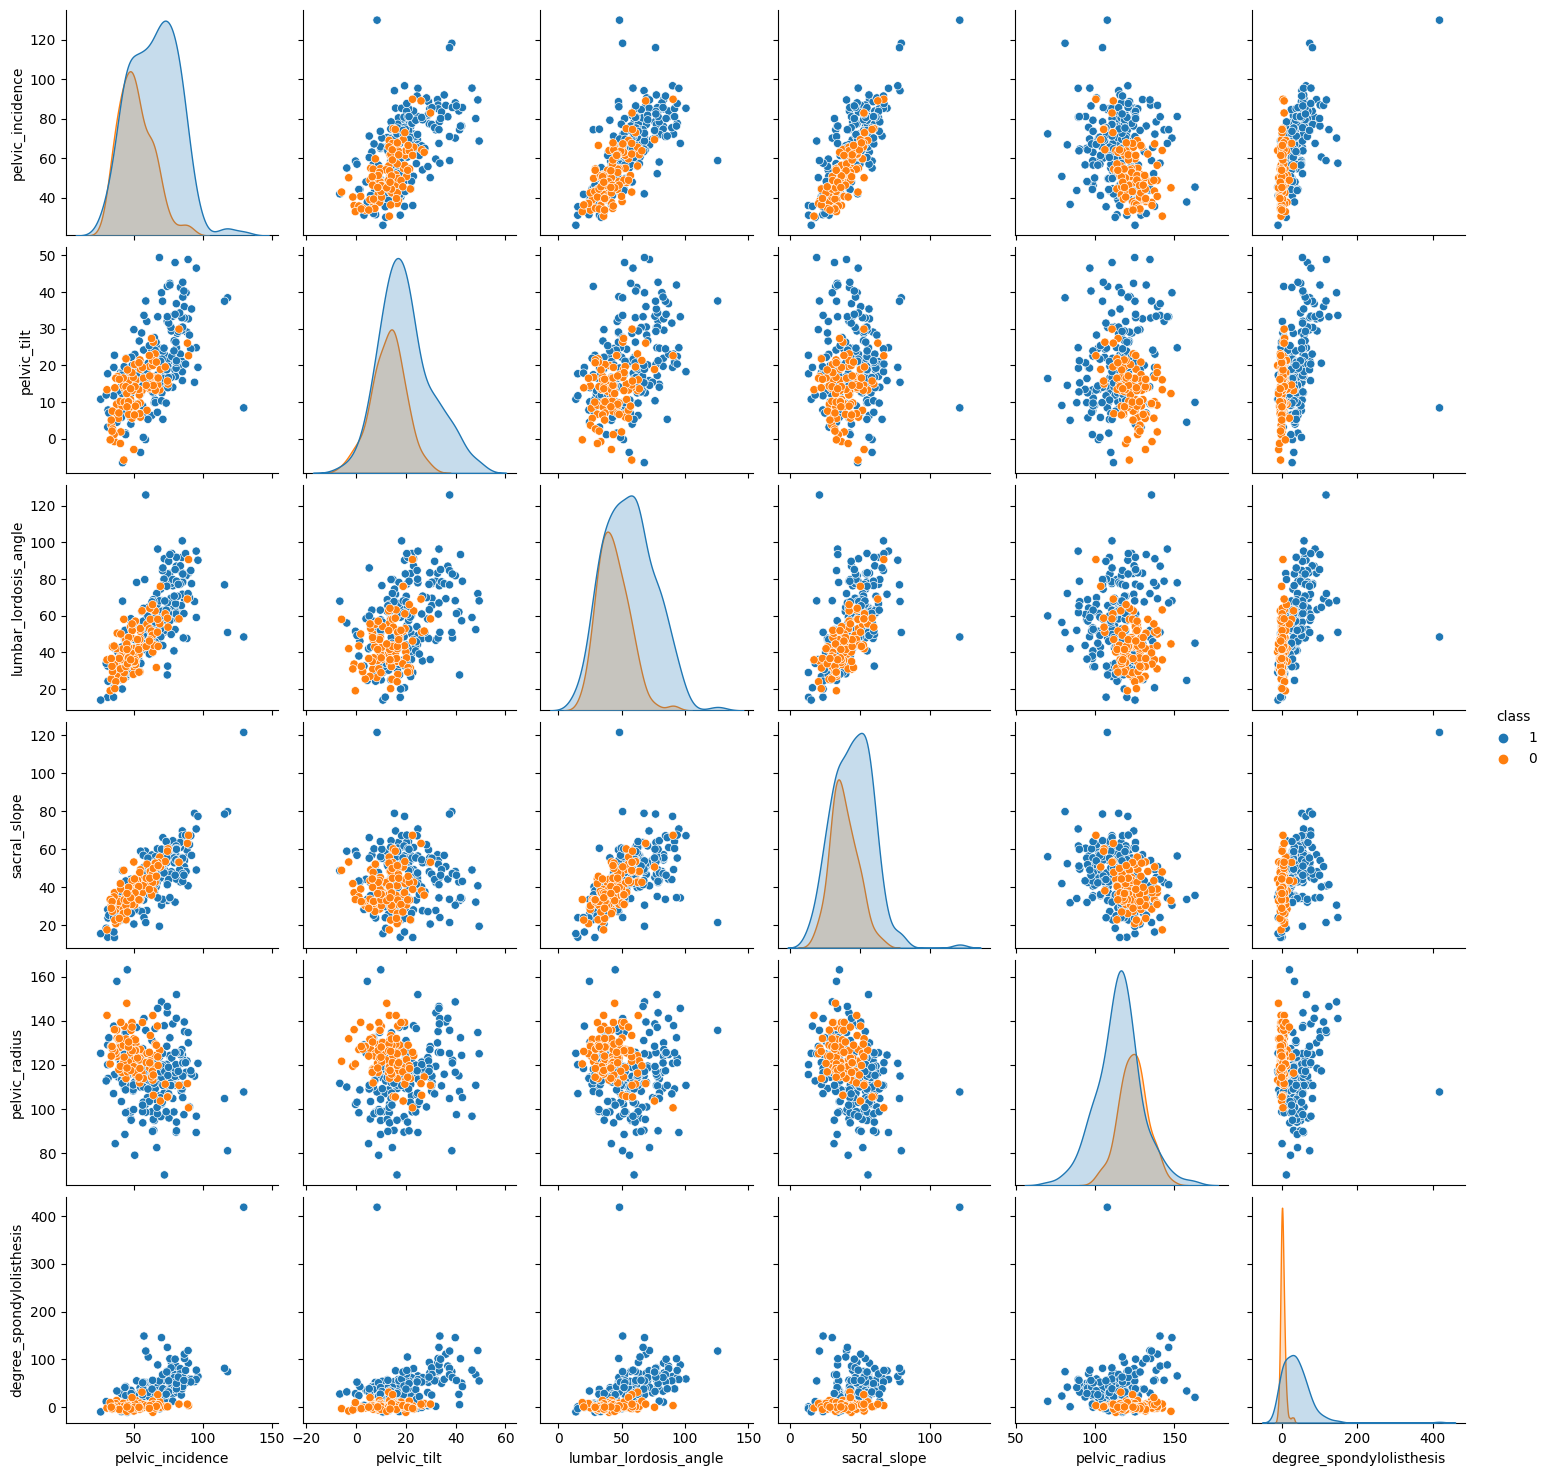

In [3]:
my_first_type = vert_data["class"][0]
#[3] #Divide the data into all normal, and all abnormal results
all_normal = vert_data.query(expr=' `class` == \'0\' ')
all_abnormal = vert_data.query(expr=' `class` == \'1\' ')

#[4] #Make pairplot
seaborn.pairplot(vert_data, hue="class")

#### ii. Boxplots

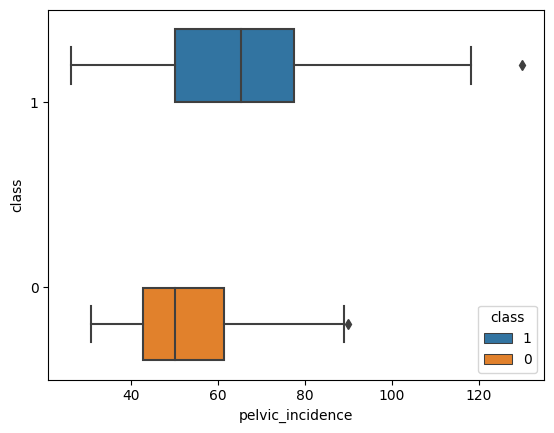

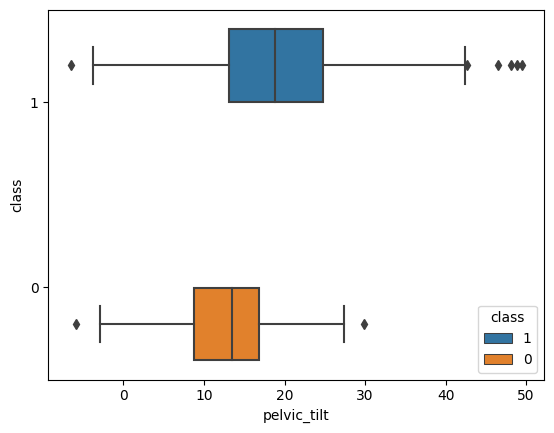

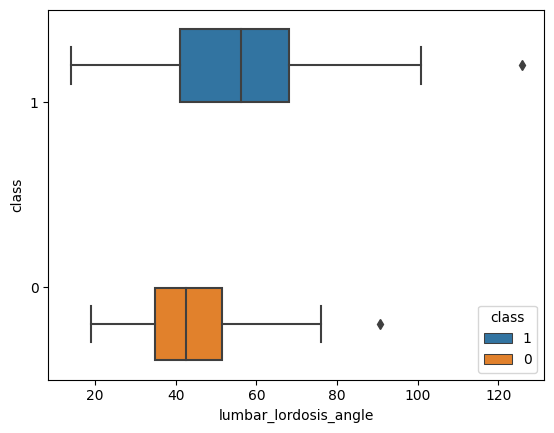

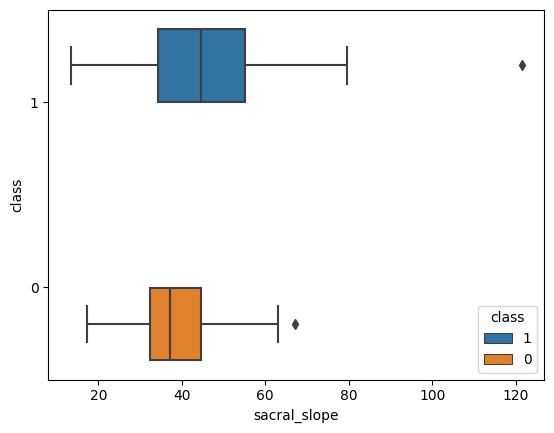

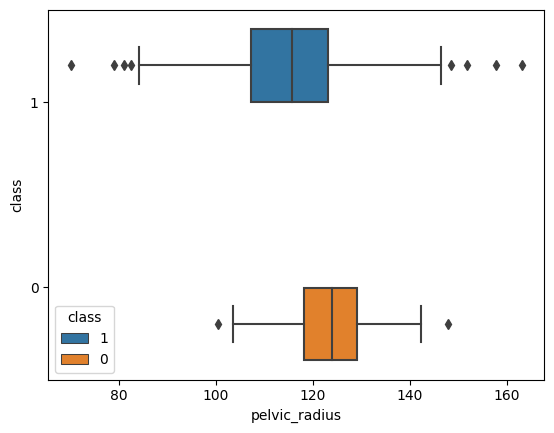

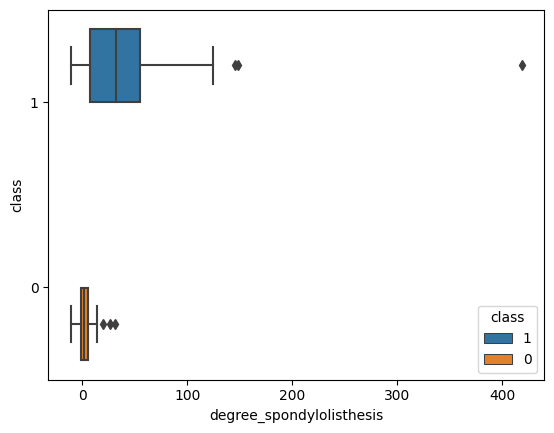

In [4]:
#[5] #Make boxplots
pi_boxplot = seaborn.boxplot(data=vert_data, x="pelvic_incidence", y="class", hue="class")
plt.show()
pt_boxplot = seaborn.boxplot(data=vert_data, x="pelvic_tilt", y="class", hue="class")
plt.show()
lla_boxplot = seaborn.boxplot(data=vert_data, x="lumbar_lordosis_angle", y="class", hue="class")
plt.show()
ss_boxplot = seaborn.boxplot(data=vert_data, x="sacral_slope", y="class", hue="class")
plt.show()
pr_boxplot = seaborn.boxplot(data=vert_data, x="pelvic_radius", y="class", hue="class")
plt.show()
ds_boxplot = seaborn.boxplot(data=vert_data, x="degree_spondylolisthesis", y="class", hue="class")
plt.show()


#### iii. Split Data Set

In [5]:
#[6]
# Create training datasets
train_normal = all_normal.iloc[:70]
train_abnormal = all_abnormal.iloc[:140]
# Create testing datasets
test_normal = all_normal.iloc[70:]
test_abnormal = all_abnormal.iloc[140:]

#[7]
#Combine datasets together
all_train = pd.concat([train_normal, train_abnormal])
all_test = pd.concat([test_normal, test_abnormal])

print(all_train.shape, all_test.shape)

(210, 7) (100, 7)


### (c) Classification

#### i. Euclidean Metric

In [6]:
#[8]
# Example:
# k = 7
# euclid_knn = neighbors.KNeighborsClassifier(n_neighbors=k, p=2)

#### ii. Test Data

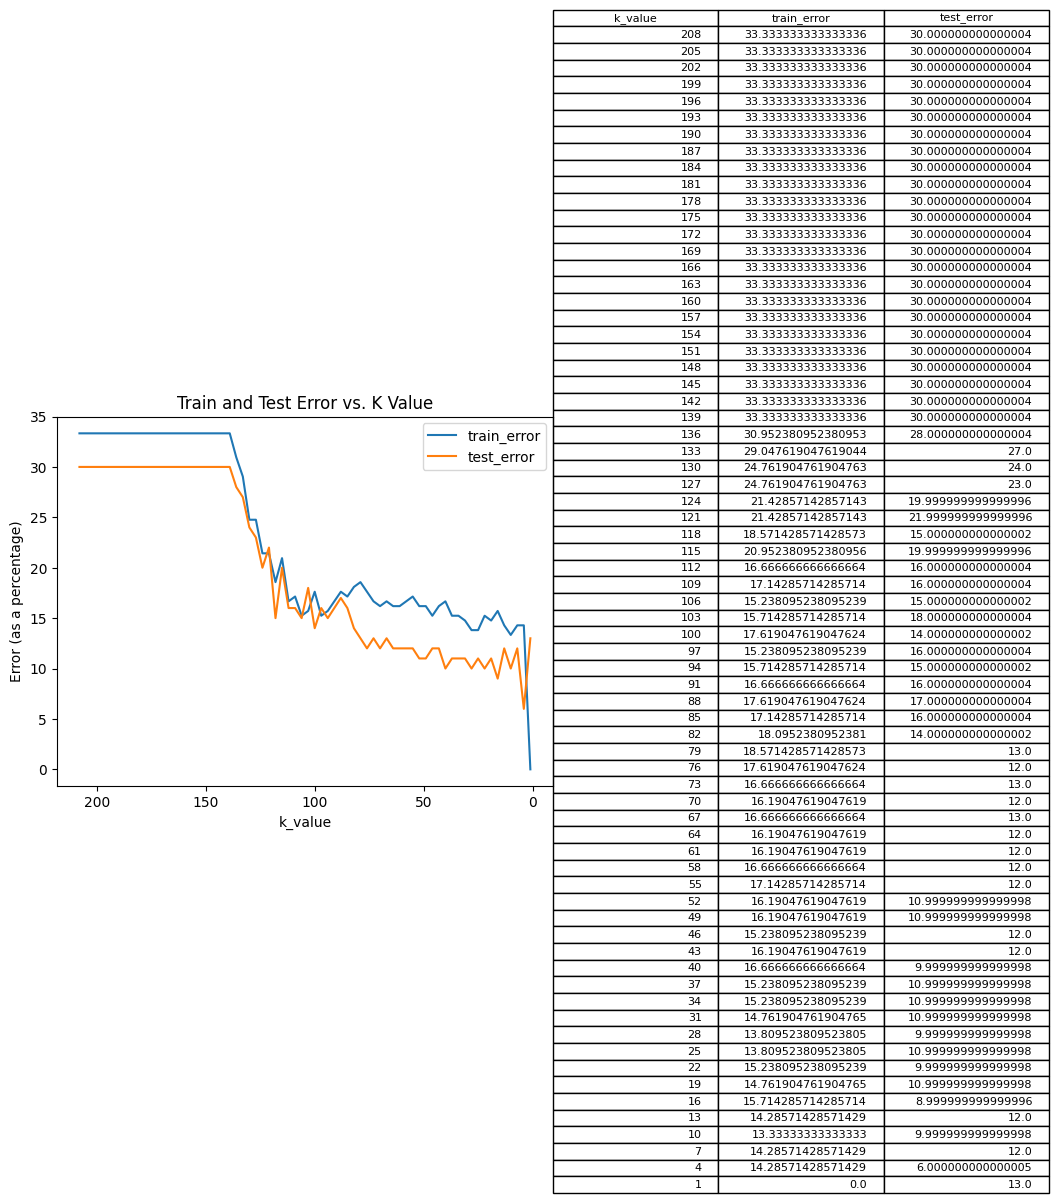

4


In [7]:
training_error_array = []
#Split train and test data between features (X) and the label (Y)
all_train_X = all_train[["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"]]
all_train_Y = all_train["class"]

all_test_X = all_test[["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"]]
all_test_Y = all_test["class"]

# k = 7
# euclid_knn = neighbors.KNeighborsClassifier(n_neighbors=k, p=2)
# euclid_knn.fit(all_train_X, all_train_Y)

# print(euclid_knn.classes_)
# print(euclid_knn.effective_metric_)
# print(euclid_knn.n_features_in_)
# print(euclid_knn.feature_names_in_)
# print(euclid_knn.n_samples_fit_)

#[8] [9]
# Create all the k values we're going to test
k_values = []
k = 208
while k > 0:
    k_values.append(k)
    k = k - 3

error_arrays = []
test_accuracy_score_array = []

for this_k_value in k_values: #for each k value
    euclid_knn = neighbors.KNeighborsClassifier(n_neighbors=this_k_value, p=2) #Use the euclidean metric of p = 2
    euclid_knn.fit(X=all_train_X, y=all_train_Y)

    train_predicted_y = euclid_knn.predict(X=all_train_X)
    test_predicted_y = euclid_knn.predict(X=all_test_X)

    #[10] #Get accuracy scores
    train_accuracy_score = metrics.accuracy_score(y_true=all_train_Y, y_pred=train_predicted_y, normalize=True)
    test_accuracy_score = metrics.accuracy_score(y_true=all_test_Y, y_pred=test_predicted_y, normalize=True)
    #Transform accuracy scores into error scores
    train_error_score = (1.0 - train_accuracy_score) * 100.0
    test_error_score = (1.0 - test_accuracy_score) * 100.0

    error_arrays.append([this_k_value, train_error_score, test_error_score])

    test_accuracy_score_array.append(test_accuracy_score)

    training_error_array.append(train_error_score)

accuracy_df = pd.DataFrame(np.array(error_arrays), columns=["k_value", "train_error", "test_error"])

#[21] #Create plot for train and test error
seaborn.lineplot(data=accuracy_df, x="k_value", y="train_error", label="train_error")
seaborn.lineplot(data=accuracy_df, x="k_value", y="test_error", label="test_error")
plt.ylabel("Error (as a percentage)")
plt.legend()
plt.plot()
plt.title("Train and Test Error vs. K Value")
#[11]
plt.gca().invert_xaxis()
#[16] #Create table of train and test errors
plt.table(cellText=error_arrays, loc=14, colLabels=["k_value", "train_error", "test_error"])
plt.show()
#Find k value with highest accuracy (lowest error) score
max_test_accuracy_score_index = np.argmax(test_accuracy_score_array)
best_k_euclidean = k_values[max_test_accuracy_score_index]
print(best_k_euclidean)

The k value that had the highest accuracy is k = 4, with an accuracy of 0.94 (the classifier accurately classified 94% of the test data) and an error rate of 0.06 (6%). (This is for the test set, not the training set.)

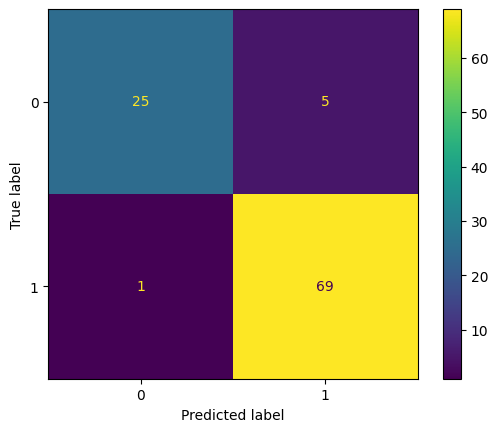

In [8]:
CM_knn = neighbors.KNeighborsClassifier(n_neighbors=4, p=2) #euclidean metric and with k = 4 (best k value)
CM_knn.fit(X=all_train_X, y=all_train_Y)

CM_predicted_Y = CM_knn.predict(X=all_test_X)

# print(metrics.accuracy_score(y_true=all_test_Y, y_pred=CM_predicted_Y))
#[12] # create a confusion matrix between the actual Y values and the predicted Y values with k = 4
CM_grid = metrics.confusion_matrix(y_true=all_test_Y, y_pred=CM_predicted_Y)
CM_display = metrics.ConfusionMatrixDisplay(confusion_matrix=CM_grid)
CM_display.plot()

In [9]:

#[13] [14]
# Calculate true positive, true negative, precision, and f score with k = 4
true_positive = metrics.recall_score(y_true=all_test_Y, y_pred=CM_predicted_Y, pos_label="1")
print(true_positive)

true_negative = (25.0)/(25.0 + 5.0)
print(true_negative)

precision = metrics.precision_score(y_true=all_test_Y, y_pred=CM_predicted_Y, pos_label="1")
print(precision)

f_score = metrics.f1_score(y_true=all_test_Y, y_pred=CM_predicted_Y, pos_label="1")
print(f_score)

0.9857142857142858
0.8333333333333334
0.9324324324324325
0.9583333333333333


In calculating these values, I assume that "Abnormal" (class 1) means a positive case. I assume that "normal" (class 0) means a negative case.

True Positive Rate = 0.9857 (98.57%)

True Negative Rate = 0.8333 (83.33%)

Precision = 0.9324

F1 Score = 0.9583

#### iii. Learning Curve

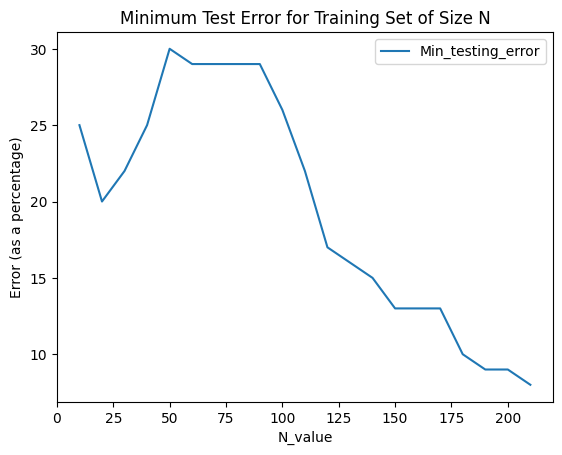

In [10]:
N_array = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210]
#for each N size in the above N_array
NK_result_array = []
#[8] [10]
for this_N_value in N_array:
    #Divide the normal and abnormal training set into parts that add up to this_N_value
    normal_boundary = this_N_value // 3

    abnormal_boundary = this_N_value - (this_N_value // 3)

    #[15]
    normal_training_set = train_normal.head(normal_boundary)
    abnormal_training_set = train_abnormal.head(abnormal_boundary)

    combined_training_set = pd.concat([normal_training_set, abnormal_training_set])

    combined_training_set_X = combined_training_set[["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"]]
    combined_training_set_Y = combined_training_set["class"]
    # Use k values up to the size of this_N_value
    NK_k_array = []
    NK_value = 1
    while NK_value < this_N_value:
        NK_k_array.append(NK_value)
        NK_value = NK_value + 5
    #for each k value, fit a new KNN classifier
    NK_error_scores = []
    for this_NK_value in NK_k_array:
        NK_knn = neighbors.KNeighborsClassifier(n_neighbors=this_NK_value, p=2)

        NK_knn.fit(X=combined_training_set_X, y=combined_training_set_Y)

        NK_prediction_Y = NK_knn.predict(X=all_test_X)
        #[10]
        NK_accuracy = metrics.accuracy_score(y_true=all_test_Y, y_pred=NK_prediction_Y, normalize=True)

        NK_error = (1.0 - NK_accuracy) * 100.0

        NK_error_scores.append(NK_error)

        #Get training data
        NK_training_Y = NK_knn.predict(X=combined_training_set_X)
        NK_training_accuracy = metrics.accuracy_score(y_true=combined_training_set_Y, y_pred=NK_training_Y, normalize=True) #[10]
        NK_training_error = (1.0 - NK_training_accuracy) * 100.0
        training_error_array.append(NK_training_error)
    #find the minimum error for this particular this_N_value
    NK_min_error = np.min(NK_error_scores)

    NK_result_array.append([this_N_value, NK_min_error])
#Create graph for the learning curve (plotting min testting error vs. N_value)
learning_curve_df = pd.DataFrame(np.array(NK_result_array), columns=["N_value", "Min_testing_error"])
#[21]
seaborn.lineplot(data=learning_curve_df, x="N_value", y="Min_testing_error", label="Min_testing_error")
plt.ylabel("Error (as a percentage)")
plt.legend()
plt.plot()
plt.title("Minimum Test Error for Training Set of Size N")
plt.show()

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [11]:
other_metrics_results = []

man_k_array = []
man_k_value = 1
while man_k_value < 197:
    man_k_array.append(man_k_value)
    man_k_value = man_k_value + 5
#[8] [10]
man_error_scores = []
for this_man_k_value in man_k_array:
    man_knn = neighbors.KNeighborsClassifier(n_neighbors=this_man_k_value, p=1) #p = 1 means Manhattan distance

    man_knn.fit(X=all_train_X, y=all_train_Y)

    man_prediction_y = man_knn.predict(X=all_test_X)

    man_accuracy = metrics.accuracy_score(y_true=all_test_Y, y_pred=man_prediction_y, normalize=True) #[10]

    man_error = (1.0 - man_accuracy) * 100.0

    print(man_error)

    man_error_scores.append(man_error)

    #Get training data
    man_training_prediction_y = man_knn.predict(X=all_train_X)
    man_training_accuracy = metrics.accuracy_score(y_true=all_train_Y, y_pred=man_training_prediction_y, normalize=True) #[10]
    man_training_error = (1.0 - man_training_accuracy) * 100.0
    training_error_array.append(man_training_error)

man_min_error = np.min(man_error_scores)
man_min_error_index = np.argmin(man_error_scores)

print("The k values that has the minimum error is: k = 1, k = 6, and k = 11")

print("The minimum error is:", man_min_error)

other_metrics_results.append(["Manhattan Distance", man_min_error])

10.999999999999998
10.999999999999998
10.999999999999998
12.0
12.0
10.999999999999998
12.0
13.0
13.0
13.0
14.000000000000002
13.0
15.000000000000002
15.000000000000002
14.000000000000002
14.000000000000002
16.000000000000004
15.000000000000002
19.999999999999996
19.999999999999996
21.999999999999996
20.999999999999996
23.0
20.999999999999996
21.999999999999996
24.0
28.000000000000004
28.000000000000004
30.000000000000004
30.000000000000004
30.000000000000004
30.000000000000004
30.000000000000004
30.000000000000004
30.000000000000004
30.000000000000004
30.000000000000004
30.000000000000004
30.000000000000004
30.000000000000004
The k values that has the minimum error is: k = 1, k = 6, and k = 11
The minimum error is: 10.999999999999998


The k values that has the minimum error is: k = 1, k = 6, and k = 11

The minimum error is: 10.999999999999998

##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

I will be choosing k = 11 for this part, as it is the highest k value with the minimum error value. A higher k value should reduce overfitting.

In [12]:
p_values = []
exponent_array =[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
#[8] [10]
log_error_array = []
for this_exponent in exponent_array:
    this_p_value = 10.0 ** this_exponent #define new p value

    log_knn = neighbors.KNeighborsClassifier(n_neighbors=11, p=this_p_value)
    log_knn.fit(X=all_train_X, y=all_train_Y)
    log_prediction_y = log_knn.predict(X=all_test_X)
    log_accuracy = metrics.accuracy_score(y_true=all_test_Y, y_pred=log_prediction_y, normalize=True) #[10]

    log_error = (1.0 - log_accuracy) * 100.0

    log_error_array.append(log_error)

    print(log_error)

    desc_string = "log(p) = " + str(this_exponent)
    other_metrics_results.append([desc_string, log_error])

    #Get training data
    log_training_prediction_y = log_knn.predict(X=all_train_X)
    log_training_accuracy = metrics.accuracy_score(y_true=all_train_Y, y_pred=log_training_prediction_y, normalize=True) #[10]
    log_training_error = (1.0 - log_training_accuracy) * 100.0
    training_error_array.append(log_training_error)

log_min_error = np.min(log_error_array)
log_min_error_index = np.argmin(log_error_array)
log_min_exponent = exponent_array[log_min_error_index]

print("The minimum error is:", log_min_error)
print("The minimum error is acheved when log(p) is 0.1, 0.2, 0.8, 0.9, or 1.0 (all have a minimum error of 11)")    

10.999999999999998
10.999999999999998
12.0
12.0
12.0
12.0
12.0
10.999999999999998
10.999999999999998
10.999999999999998
The minimum error is: 10.999999999999998
The minimum error is acheved when log(p) is 0.1, 0.2, 0.8, 0.9, or 1.0 (all have a minimum error of 11)


The minimum error is: 10.999999999999998

The minimum error is acheved when log(p) is 0.1, 0.2, 0.8, 0.9, or 1.0 (all have a minimum error of 11)

##### C. Chebyshev Distance With p -> infinity.

In [13]:
#[8] [10]
cheb_error_array = []
for this_cheb_k_value in man_k_array:
    #[17] [22]
    cheb_knn = neighbors.KNeighborsClassifier(n_neighbors=this_cheb_k_value, metric="chebyshev")

    cheb_knn.fit(X=all_train_X, y=all_train_Y)
    cheb_prediction_y = cheb_knn.predict(X=all_test_X)
    cheb_accuracy = metrics.accuracy_score(y_true=all_test_Y, y_pred=cheb_prediction_y, normalize=True) #[10]
    cheb_error = (1.0 - cheb_accuracy) * 100.0
    cheb_error_array.append(cheb_error)

    print(cheb_error)
    
    # Get training data
    cheb_training_prediction_y = cheb_knn.predict(X=all_train_X)
    cheb_training_accuracy = metrics.accuracy_score(y_true=all_train_Y, y_pred=cheb_training_prediction_y, normalize=True) #[10]
    cheb_training_error = (1.0 - cheb_training_accuracy) * 100.0
    training_error_array.append(cheb_training_error)

cheb_min_error = np.min(cheb_error_array)
cheb_min_error_index = np.argmin(cheb_error_array)
cheb_min_k_value = man_k_array[cheb_min_error_index]

print("The minimum error is:", cheb_min_error)
print("The k value that has the minimum error is:", cheb_min_k_value)

other_metrics_results.append(["Chebyshev Distance", cheb_min_error])

13.0
9.999999999999998
12.0
7.9999999999999964
10.999999999999998
12.0
12.0
9.999999999999998
13.0
12.0
12.0
12.0
14.000000000000002
13.0
14.000000000000002
10.999999999999998
14.000000000000002
12.0
15.000000000000002
14.000000000000002
18.999999999999993
18.000000000000004
18.000000000000004
18.000000000000004
20.999999999999996
20.999999999999996
25.0
28.000000000000004
30.000000000000004
30.000000000000004
30.000000000000004
30.000000000000004
30.000000000000004
30.000000000000004
30.000000000000004
30.000000000000004
30.000000000000004
30.000000000000004
30.000000000000004
30.000000000000004
The minimum error is: 7.9999999999999964
The k value that has the minimum error is: 16


The minimum error is: 7.9999999999999964

The k value that has the minimum error is: 16

#### ii. Mahalanobis Distance.

In [14]:
mahal_error_array = []

#[18] [19] # creating inverse covariance matrix
covariance_matrix = np.cov(all_train_X.to_numpy(), rowvar=False)
#[20]
inverse_covariance_matrix = np.linalg.inv(covariance_matrix)

#[8] [10]
for this_mahal_k_value in man_k_array:
    #[17] #[22]
    mahal_knn = neighbors.KNeighborsClassifier(n_neighbors=this_mahal_k_value, metric="mahalanobis", metric_params={"VI": inverse_covariance_matrix})

    mahal_knn.fit(X=all_train_X, y=all_train_Y)
    mahal_prediction_y = mahal_knn.predict(X=all_test_X)
    mahal_accuracy = metrics.accuracy_score(y_true=all_test_Y, y_pred=mahal_prediction_y, normalize=True) #[10]
    mahal_error = (1.0 - mahal_accuracy) * 100.0
    mahal_error_array.append(mahal_error)

    print(mahal_error)

    # Get training data
    mahal_training_prediction_y = mahal_knn.predict(X=all_train_X)
    mahal_training_accuracy = metrics.accuracy_score(y_true=all_train_Y, y_pred=mahal_training_prediction_y, normalize=True) #[10]
    mahal_training_error = (1.0 - mahal_training_accuracy) * 100.0
    training_error_array.append(mahal_training_error)

mahal_min_error = np.min(mahal_error_array)
mahal_min_error_index = np.argmin(mahal_error_array)
mahal_min_k_value = man_k_array[mahal_min_error_index]

print("The minimum error is:", mahal_min_error)
print("The k value that has the minimum error is k = 1 (has minimum error of 14.)")

other_metrics_results.append(["Mahalanobis Distance", mahal_min_error])

14.000000000000002
16.000000000000004
18.000000000000004
17.000000000000004
18.999999999999993
17.000000000000004
18.000000000000004
18.999999999999993
20.999999999999996
18.999999999999993
18.999999999999993
18.999999999999993
21.999999999999996
21.999999999999996
21.999999999999996
23.0
21.999999999999996
23.0
24.0
23.0
23.0
24.0
24.0
26.0
28.000000000000004
30.000000000000004
30.000000000000004
30.000000000000004
30.000000000000004
30.000000000000004
30.000000000000004
30.000000000000004
30.000000000000004
30.000000000000004
30.000000000000004
30.000000000000004
30.000000000000004
30.000000000000004
30.000000000000004
30.000000000000004
The minimum error is: 14.000000000000002
The k value that has the minimum error is k = 1 (has minimum error of 14.)


The minimum error is: 14.000000000000004

The k value that has the minimum error is k = 1.

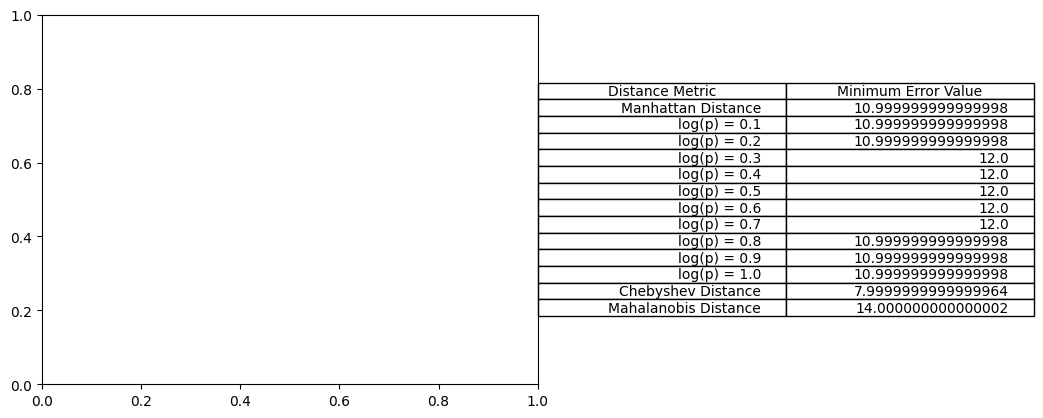

In [15]:
#[16]
plt.table(cellText=other_metrics_results, loc=14, colLabels=["Distance Metric", "Minimum Error Value"])

### (e) Weighted Decision

In [16]:
# Euclidean Weighted
#[8] [10]
euclb_error_array = []
for this_euclb_k_value in man_k_array:
    #[17]
    euclb_knn = neighbors.KNeighborsClassifier(n_neighbors=this_euclb_k_value, p=2, weights="distance")
    euclb_knn.fit(X=all_train_X, y=all_train_Y)
    euclb_prediction_y = euclb_knn.predict(X=all_test_X)
    euclb_accuracy = metrics.accuracy_score(y_true=all_test_Y, y_pred=euclb_prediction_y, normalize=True) #[10]
    euclb_error = (1.0 - euclb_accuracy) * 100.0
    euclb_error_array.append(euclb_error)

    # Get training data
    euclb_training_prediction_y = euclb_knn.predict(X=all_train_X)
    euclb_training_accuracy = metrics.accuracy_score(y_true=all_train_Y, y_pred=euclb_training_prediction_y, normalize=True) #[10]
    euclb_training_error = (1.0 - euclb_training_accuracy) * 100.0
    training_error_array.append(euclb_training_error)

euclb_min_error = np.min(euclb_error_array)
euclb_min_error_index = np.argmin(euclb_error_array)
euclb_min_k_value = man_k_array[euclb_min_error_index]

#Manhattan Weighted
#[8] [10]
manlb_error_array = []
for this_manlb_k_value in man_k_array:
    #[17]
    manlb_knn = neighbors.KNeighborsClassifier(n_neighbors=this_manlb_k_value, p=1, weights="distance")
    manlb_knn.fit(X=all_train_X, y=all_train_Y)
    manlb_prediction_y = manlb_knn.predict(X=all_test_X)
    manlb_accuracy = metrics.accuracy_score(y_true=all_test_Y, y_pred=manlb_prediction_y, normalize=True) #[10]
    manlb_error = (1.0 - manlb_accuracy) * 100.0
    manlb_error_array.append(manlb_error)

    # Get training data
    manlb_training_prediction_y = manlb_knn.predict(X=all_train_X)
    manlb_training_accuracy = metrics.accuracy_score(y_true=all_train_Y, y_pred=manlb_training_prediction_y, normalize=True) #[10]
    manlb_training_error = (1.0 - manlb_training_accuracy) * 100.0
    training_error_array.append(manlb_training_error)

manlb_min_error = np.min(manlb_error_array)
manlb_min_error_index = np.argmin(manlb_error_array)
manlb_min_k_value = man_k_array[manlb_min_error_index]

#Chebyshev Weighted
#[8] [10]
cheblb_error_array = []
for this_cheblb_k_value in man_k_array:
    #[17]
    cheblb_knn = neighbors.KNeighborsClassifier(n_neighbors=this_cheblb_k_value, metric="chebyshev", weights="distance")
    cheblb_knn.fit(X=all_train_X, y=all_train_Y)
    cheblb_prediction_y = cheblb_knn.predict(X=all_test_X)
    cheblb_accuracy = metrics.accuracy_score(y_true=all_test_Y, y_pred=cheblb_prediction_y, normalize=True) #[10]
    cheblb_error = (1.0 - cheblb_accuracy) * 100.0
    cheblb_error_array.append(cheblb_error)

    print(cheblb_error)

    # Get training data
    cheblb_training_prediction_y = cheblb_knn.predict(X=all_train_X)
    cheblb_training_accuracy = metrics.accuracy_score(y_true=all_train_Y, y_pred=cheblb_training_prediction_y, normalize=True) #[10]
    cheblb_training_error = (1.0 - cheblb_training_accuracy) * 100.0
    training_error_array.append(cheblb_training_error)

cheblb_min_error = np.min(cheblb_error_array)
cheblb_min_error_index = np.argmin(cheblb_error_array)
cheblb_min_k_value = man_k_array[cheblb_min_error_index]

print("The minimum error for Euclidean weighted is:", euclb_min_error)
print("The k value that has the minimum error for Euclidean weighted is:", euclb_min_k_value)

print("-----------")

print("The minimum error for Manhattan weighted is:", manlb_min_error)
print("The k value that has the minimum error for Manhattan weighted is:", manlb_min_k_value)

print("-----------")

print("The minimum error for Chebyshev weighted is:", cheblb_min_error)
print("The k value that has the minimum error for Chebyshev weighted is: k= 16, k=31, k = 36, k = 41")


13.0
13.0
12.0
10.999999999999998
12.0
12.0
10.999999999999998
10.999999999999998
10.999999999999998
12.0
12.0
12.0
10.999999999999998
13.0
12.0
12.0
12.0
14.000000000000002
13.0
14.000000000000002
14.000000000000002
14.000000000000002
14.000000000000002
14.000000000000002
15.000000000000002
14.000000000000002
16.000000000000004
16.000000000000004
18.000000000000004
18.999999999999993
20.999999999999996
20.999999999999996
23.0
26.0
26.0
26.0
27.0
27.0
27.0
28.000000000000004
The minimum error for Euclidean weighted is: 9.999999999999998
The k value that has the minimum error for Euclidean weighted is: 6
-----------
The minimum error for Manhattan weighted is: 9.999999999999998
The k value that has the minimum error for Manhattan weighted is: 26
-----------
The minimum error for Chebyshev weighted is: 10.999999999999998
The k value that has the minimum error for Chebyshev weighted is: k= 16, k=31, k = 36, k = 41


The minimum error for Euclidean weighted is: 9.999999999999998

The k value that has the minimum error for Euclidean weighted is: 6

-------------

The minimum error for Manhattan weighted is: 9.999999999999998

The k value that has the minimum error for Manhattan weighted is: 26

-------------

The minimum error for Chebyshev weighted is: 10.999999999999998

The k value that has the minimum error for Chebyshev weighted is: k= 16, k=31, k = 36, k = 41

### (f) Training Error Rate

In [17]:
minimum_training_error_overall = np.min(training_error_array)
print("The lowest training error rate I got in this homework is:", minimum_training_error_overall)

The lowest training error rate I got in this homework is: 0.0


The lowest training error rate I got in this homework is: 0.0.

This occurred when training using a classifier with Euclidean distance and k = 1. This makes sense as when you run the classifier with the training data as input, the closest *one* point to each point in the training data will be that datapoint itself!

References:

[1] https://medium.com/analytics-vidhya/deep-dive-in-machine-learning-with-python-b724b8d355a0

[2] https://www.geeksforgeeks.org/how-to-replace-values-in-column-based-on-condition-in-pandas/

[3] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html

[4] https://seaborn.pydata.org/generated/seaborn.pairplot.html

[5] https://seaborn.pydata.org/generated/seaborn.boxplot.html

[6] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html

[7] https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

[8] https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

[9] https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

[10] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

[11] https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html

[12] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

[13] https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

[14] https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

[15] https://datatofish.com/first-n-rows-pandas-dataframe/#:~:text=You%20can%20use%20df.,N%20rows%20in%20Pandas%20DataFrame.&text=Alternatively%2C%20you%20can%20specify%20a,excluding%20the%20last%20N%20rows.

[16] https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.table.html

[17] https://docs.scipy.org/doc/scipy/reference/spatial.distance.html

[18] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html

[19] https://numpy.org/doc/stable/reference/generated/numpy.cov.html

[20] https://sparkbyexamples.com/numpy/numpy-inverse-matrix-in-python/

[21] https://seaborn.pydata.org/generated/seaborn.lineplot.html

[22] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html#sklearn.metrics.DistanceMetric.get_metric

END OF DOC